# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

!pip install opencv-python
import datetime
import os
import cv2

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

main_accent_colour = "#b366ff"
dim_colour = "darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]




# Analyzing

In [2]:
train_dir = "C:\\Users\\asus\\Downloads\\train n test\\train"
test_dir = "C:\\Users\\asus\\Downloads\\train n test\\test"

row = 48
col = 48
classes = len(os.listdir( "C:\\Users\\asus\\Downloads\\train n test\\train"))

In [3]:
import os

# Define the directory paths
train_dir = r'C:\Users\asus\Downloads\train n test\train\\'
test_dir = r'C:\Users\asus\Downloads\train n test\test\\'

print("Train Set:")

train_count = []
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    print(folder, "folder contains\t\t", len(os.listdir(folder_path)), "images")
    train_count.append(len(os.listdir(folder_path)))
    
print()

test_count = []
print("Test Set:")
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    print(folder, "folder contains\t\t", len(os.listdir(folder_path)), "images")
    test_count.append(len(os.listdir(folder_path)))


Train Set:
angry folder contains		 115 images
disgust folder contains		 129 images
fear folder contains		 145 images
happy folder contains		 150 images
neutral folder contains		 110 images
sad folder contains		 193 images
surprise folder contains		 197 images

Test Set:
angry folder contains		 154 images
disgust folder contains		 111 images
fear folder contains		 167 images
happy folder contains		 161 images
neutral folder contains		 94 images
sad folder contains		 80 images
surprise folder contains		 202 images


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


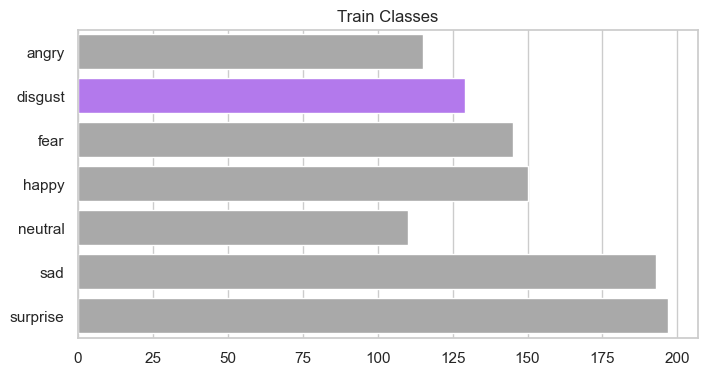

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


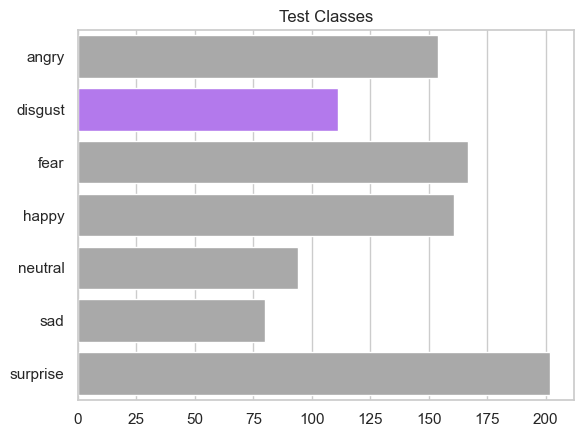

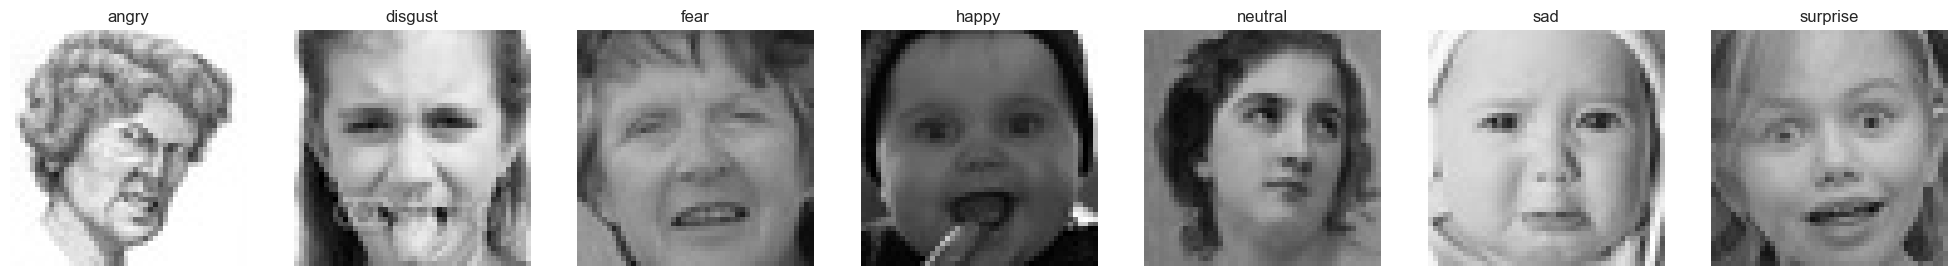

In [4]:
vals = ["disgust"]
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_dir)}

plt.figure(figsize=(8,4))

ax = sns.barplot(y=os.listdir(train_dir),
                 x=train_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Train Classes')

plt.show()

print()

ax = sns.barplot(y=os.listdir(test_dir),
                 x=test_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Test Classes')

plt.show()

print()

plt.figure(figsize=(25,25))

i = 1
for folder in os.listdir(train_dir):
    
    img = load_img((train_dir + folder +'/'+ os.listdir(train_dir + folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1
    
plt.show()

# Preprocessing

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')


Found 1039 images belonging to 7 classes.
Found 969 images belonging to 7 classes.


In [6]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# Model

In [7]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

def get_model(input_size, classes=7):
    
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Example usage
# Assuming row and col are defined
# fernet = get_model((row, col, 1), classes=7)
# fernet.summary()


In [8]:
fernet = get_model((row,col,1), classes)
fernet.summary()

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    31,720,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,116,743 (122.52 MB)

 Trainable params: 32,116,103 (122.51 MB)

 Non-trainable params: 640 (2.50 KB)

In [9]:
!pip install pydot
!pip install graphviz

In [10]:
!pip install --upgrade pydot
!pip install --upgrade graphviz
!pip install --upgrade keras


In [11]:
import pydot
pydot.Dot.create(pydot.Dot())


b"%!PS-Adobe-3.0\r\n%%Creator: graphviz version 11.0.0 (20240428.1522)\r\n%%Title: G\r\n%%Pages: (atend)\r\n%%BoundingBox: (atend)\r\n%%EndComments\r\nsave\r\n%%BeginProlog\r\n/DotDict 200 dict def\r\nDotDict begin\r\n\r\n/setupLatin1 {\r\nmark\r\n/EncodingVector 256 array def\r\n EncodingVector 0\r\n\r\nISOLatin1Encoding 0 255 getinterval putinterval\r\nEncodingVector 45 /hyphen put\r\n\r\n% Set up ISO Latin 1 character encoding\r\n/starnetISO {\r\n        dup dup findfont dup length dict begin\r\n        { 1 index /FID ne { def }{ pop pop } ifelse\r\n        } forall\r\n        /Encoding EncodingVector def\r\n        currentdict end definefont\r\n} def\r\n/Times-Roman starnetISO def\r\n/Times-Italic starnetISO def\r\n/Times-Bold starnetISO def\r\n/Times-BoldItalic starnetISO def\r\n/Helvetica starnetISO def\r\n/Helvetica-Oblique starnetISO def\r\n/Helvetica-Bold starnetISO def\r\n/Helvetica-BoldOblique starnetISO def\r\n/Courier starnetISO def\r\n/Courier-Oblique starnetISO def\r\n/C

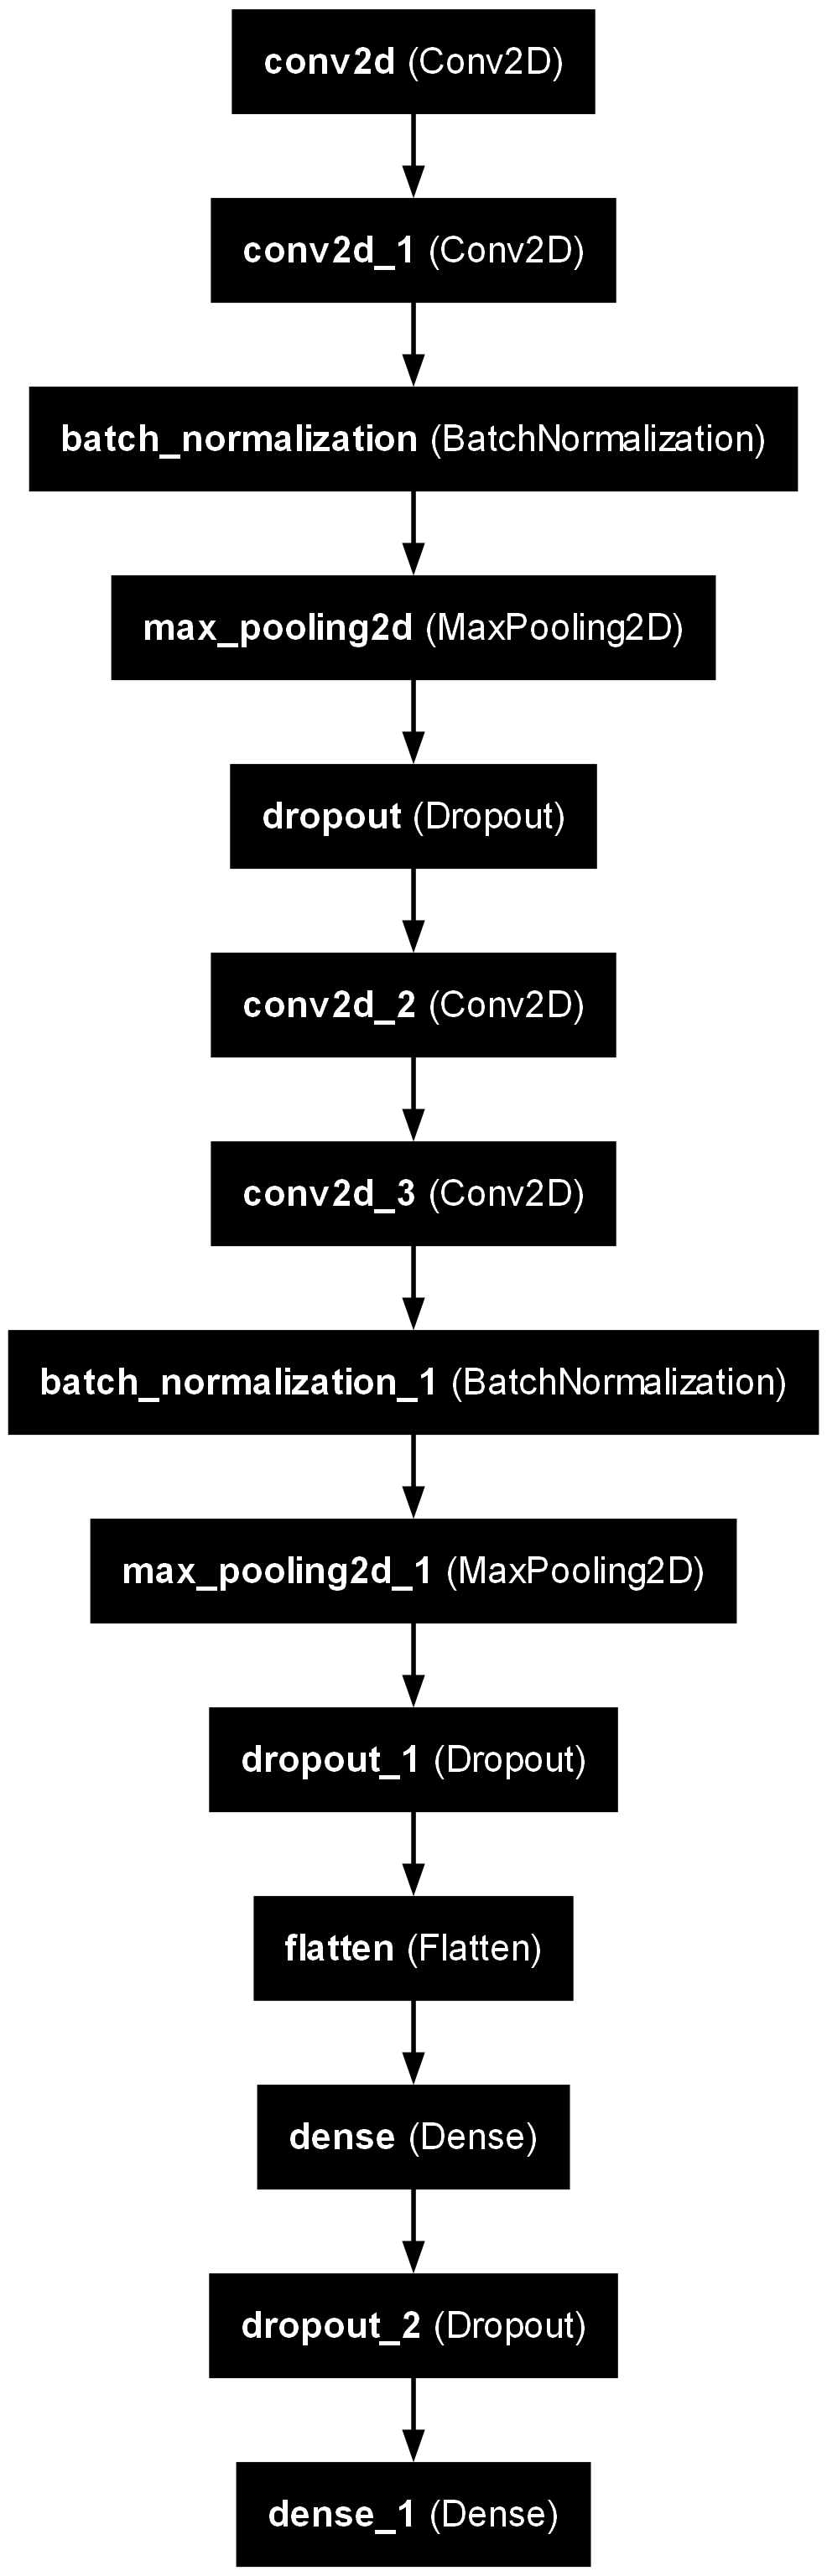

In [12]:
plot_model(fernet, show_layer_names=True)

# Checkpoint

In [17]:
chk_path = 'ferNet.keras'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [19]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                  validation_data=test_set,
                  epochs=150,
                  callbacks=callbacks,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_steps)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3093 - loss: 4.2457
Epoch 1: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3107 - loss: 4.2454 - val_accuracy: 0.2729 - val_loss: 4.3782 - learning_rate: 4.1943e-20
Epoch 2/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3125 - loss: 4.1908
Epoch 2: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3125 - loss: 4.1908 - val_accuracy: 0.1111 - val_loss: 4.4127 - learning_rate: 4.1943e-20
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3405 - loss: 4.2302
Epoch 3: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3402 - loss: 4.2304 - val_accuracy: 0.2719 - val_loss: 4.3779 - learning_rate: 4.1943e-20
Epoch 4/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.3333 - loss: 4.2311
Epoch 4: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━

 1/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2656 - loss: 4.3234
Epoch 24: val_accuracy did not improve from 0.00000

Epoch 24: ReduceLROnPlateau reducing learning rate to 3.3554432106403683e-22.
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2656 - loss: 4.3234 - val_accuracy: 0.3333 - val_loss: 4.6758 - learning_rate: 1.6777e-21
Epoch 25/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3099 - loss: 4.2673
Epoch 25: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3107 - loss: 4.2651 - val_accuracy: 0.2729 - val_loss: 4.3734 - learning_rate: 3.3554e-22
Epoch 26/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3594 - loss: 4.1857
Epoch 26: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3594 - loss: 4.1857 - val_accuracy: 0.2222 - val_loss: 4.9065 - learning_rate: 3.3554e-22
Epoch 27/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3379 - loss: 4.2580
Epoch

Epoch 47/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3131 - loss: 4.2734
Epoch 47: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3138 - loss: 4.2722 - val_accuracy: 0.2729 - val_loss: 4.3781 - learning_rate: 2.6844e-24
Epoch 48/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3594 - loss: 4.2569
Epoch 48: val_accuracy did not improve from 0.00000

Epoch 48: ReduceLROnPlateau reducing learning rate to 5.368708853034664e-25.
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3594 - loss: 4.2569 - val_accuracy: 0.1111 - val_loss: 4.4729 - learning_rate: 2.6844e-24
Epoch 49/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3167 - loss: 4.2441
Epoch 49: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3168 - loss: 4.2437 - val_accuracy: 0.2698 - val_loss: 4.3807 - learning_rate: 5.3687e-25
Epoch 50/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3906 - loss: 4

Epoch 70/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3281 - loss: 4.1326
Epoch 70: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3281 - loss: 4.1326 - val_accuracy: 0.2222 - val_loss: 4.8413 - learning_rate: 4.2950e-27
Epoch 71/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3276 - loss: 4.2313
Epoch 71: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3282 - loss: 4.2307 - val_accuracy: 0.2740 - val_loss: 4.3760 - learning_rate: 4.2950e-27
Epoch 72/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2344 - loss: 4.2833
Epoch 72: val_accuracy did not improve from 0.00000

Epoch 72: ReduceLROnPlateau reducing learning rate to 8.589934130342796e-28.
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2344 - loss: 4.2833 - val_accuracy: 0.0000e+00 - val_loss: 4.5602 - learning_rate: 4.2950e-27
Epoch 73/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3579 - lo

Epoch 93/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3340 - loss: 4.2455
Epoch 93: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3331 - loss: 4.2459 - val_accuracy: 0.2719 - val_loss: 4.3798 - learning_rate: 6.8719e-30
Epoch 94/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2969 - loss: 4.4522
Epoch 94: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2969 - loss: 4.4522 - val_accuracy: 0.2222 - val_loss: 4.2664 - learning_rate: 6.8719e-30
Epoch 95/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3780 - loss: 4.2101
Epoch 95: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3768 - loss: 4.2112 - val_accuracy: 0.2708 - val_loss: 4.3774 - learning_rate: 6.8719e-30
Epoch 96/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1875 - loss: 4.4928
Epoch 96: val_accuracy did not improve from 0.00000

Epoch 96: ReduceLRO

16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3111 - loss: 4.2482 - val_accuracy: 0.2698 - val_loss: 4.3795 - learning_rate: 1.0995e-32
Epoch 116/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.5333 - loss: 4.1505
Epoch 116: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5333 - loss: 4.1505 - val_accuracy: 0.3333 - val_loss: 4.2369 - learning_rate: 1.0995e-32
Epoch 117/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3216 - loss: 4.2250
Epoch 117: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3213 - loss: 4.2254 - val_accuracy: 0.2698 - val_loss: 4.3787 - learning_rate: 1.0995e-32
Epoch 118/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3906 - loss: 4.1956
Epoch 118: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3906 - loss: 4.1956 - val_accuracy: 0.3333 - val_loss: 4.3193 - learning_rate: 1.0995e-32
Epoch

 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 807ms/step - accuracy: 0.1719 - loss: 4.4504
Epoch 138: val_accuracy did not improve from 0.00000

Epoch 138: ReduceLROnPlateau reducing learning rate to 8.796093820798634e-35.
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1719 - loss: 4.4504 - val_accuracy: 0.0000e+00 - val_loss: 4.9502 - learning_rate: 4.3980e-34
Epoch 139/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.2756 - loss: 4.3043
Epoch 139: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2777 - loss: 4.3017 - val_accuracy: 0.2698 - val_loss: 4.3793 - learning_rate: 8.7961e-35
Epoch 140/150
 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 823ms/step - accuracy: 0.3125 - loss: 4.2082
Epoch 140: val_accuracy did not improve from 0.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3125 - loss: 4.2082 - val_accuracy: 0.3333 - val_loss: 4.3279 - learning_rate: 8.7961e-35
Epoch 141/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.339

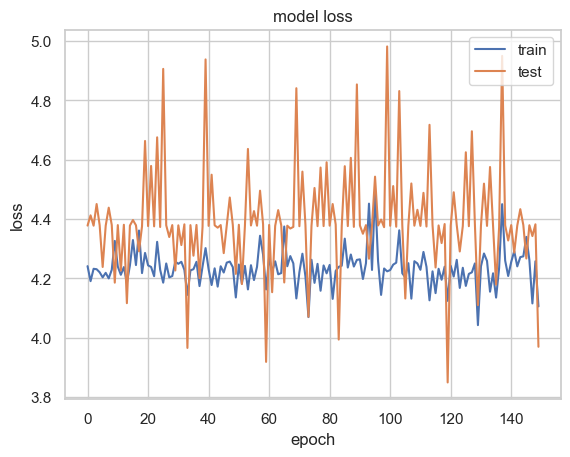

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

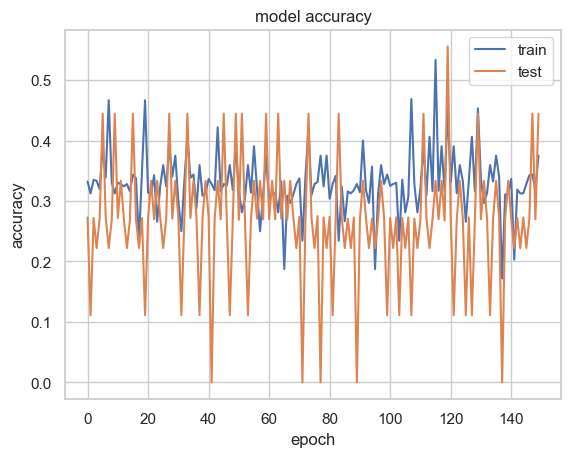

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [22]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.3557 - loss: 4.1427
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.2758 - loss: 4.3885
final train accuracy = 36.19 , validation accuracy = 27.24


# Result

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step
Confusion Matrix
[[ 2 25  9  8 13 26 32]
 [ 6 22  4 16  7 27 47]
 [ 4 29 15 27 15 17 38]
 [ 6 22  9 17  8 34 54]
 [ 3 23 11 10  8 30 25]
 [ 8 47  6 15 17 46 54]
 [ 7 29 13 23 16 33 76]]
Classification Report
              precision    recall  f1-score   support

       angry       0.06      0.02      0.03       115
     disgust       0.11      0.17      0.13       129
        fear       0.22      0.10      0.14       145
       happy       0.15      0.11      0.13       150
     neutral       0.10      0.07      0.08       110
         sad       0.22      0.24      0.23       193
    surprise       0.23      0.39      0.29       197

    accuracy                           0.18      1039
   macro avg       0.15      0.16      0.15      1039
weighted avg       0.17      0.18      0.16      1039



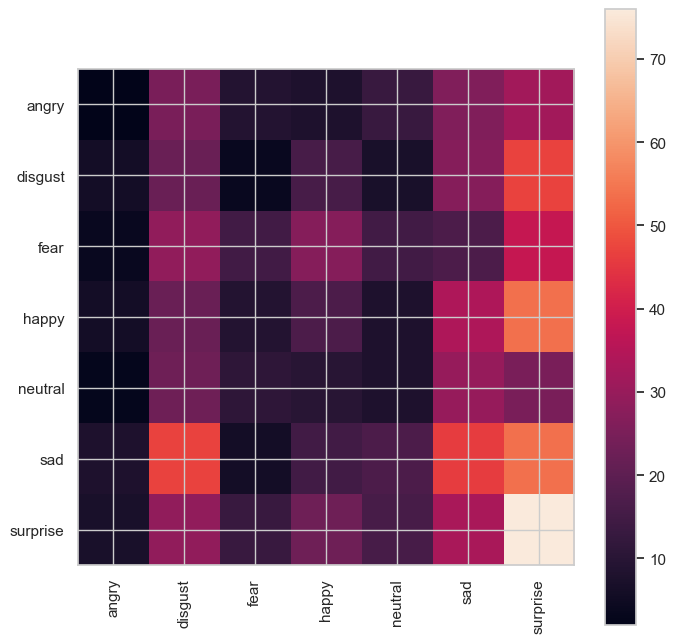

In [23]:
y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
Confusion Matrix
[[ 2 21 15 15  9 19 73]
 [ 2 17 10  9 10 14 49]
 [ 4 31 17 15  7 26 67]
 [ 6 25 14 17  5 17 77]
 [ 2 15 13 10  6 16 32]
 [ 3 10  8  5  3 12 39]
 [ 9 33 11 23 11 28 87]]
Classification Report
              precision    recall  f1-score   support

       angry       0.07      0.01      0.02       154
     disgust       0.11      0.15      0.13       111
        fear       0.19      0.10      0.13       167
       happy       0.18      0.11      0.13       161
     neutral       0.12      0.06      0.08        94
         sad       0.09      0.15      0.11        80
    surprise       0.21      0.43      0.28       202

    accuracy                           0.16       969
   macro avg       0.14      0.15      0.13       969
weighted avg       0.15      0.16      0.14       969



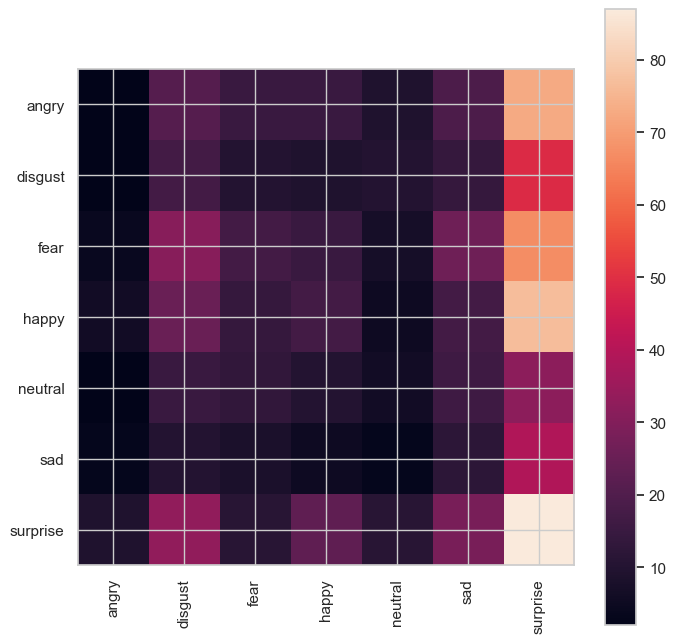

In [24]:
y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Recommending Music

In [27]:
mood_music = pd.read_csv("C:\\Users\\asus\\Downloads\\data moods\\data_moods.csv")
mood_music = mood_music[['name','artist','mood']]
mood_music.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


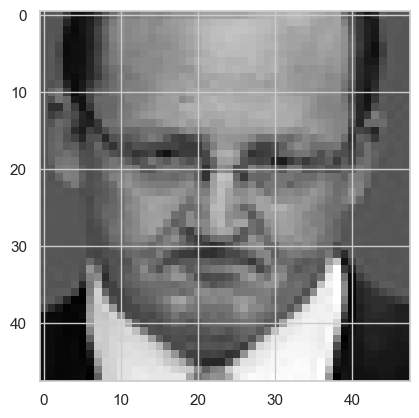

In [32]:
image = cv2.imread("C:\\Users\\asus\\Downloads\\train n test\\test\\sad\\PublicTest_9715467.jpg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='gray')
plt.show()

In [33]:
image = cv2.resize(image,(48,48))
img=np.array(image)
img=img.reshape(1,48,48,1)
predict_x=fernet.predict(img) 
result=np.argmax(predict_x,axis=1)
result[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


6

In [34]:
if(result[0]==0 or result[0]==1 or result[0]==2 ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==3 or result[0]==4):
    #for happy, neutral
    filter1=mood_music['mood']=='Happy'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==5):
       #for Sad
    filter1=mood_music['mood']=='Sad'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==6):
     #for surprise
    filter1=mood_music['mood']=='Energetic'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)

,index,name,artist,mood
0,241,"Honey, This Mirror Isn't Big Enough for the Tw...",My Chemical Romance,Energetic
1,237,Holding On,Scary Kids Scaring Kids,Energetic
2,176,Faces,Scary Kids Scaring Kids,Energetic
3,432,Pressure,Seth Hills,Energetic
4,269,Inside the Fire,Disturbed,Energetic
